In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('/Users/enrikasoucy/Downloads/archive (13)/INCART 2-lead Arrhythmia Database.csv')

In [3]:
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [4]:
type_counts = data['type'].value_counts()

In [5]:
type_names = {
    'N': 'Normal',
    'SVEB': 'Supraventricular ectopic beat',
    'VEB': 'Ventricular ectopic beat',
    'F': 'Fusion beat',
    'Q': 'Unknown beat'
}

In [6]:
print("Counts of Each Type:")
for type_code, count in type_counts.items():
    print(f"{type_names[type_code]}: {count}")

Counts of Each Type:
Normal: 153546
Ventricular ectopic beat: 20000
Supraventricular ectopic beat: 1958
Fusion beat: 219
Unknown beat: 6


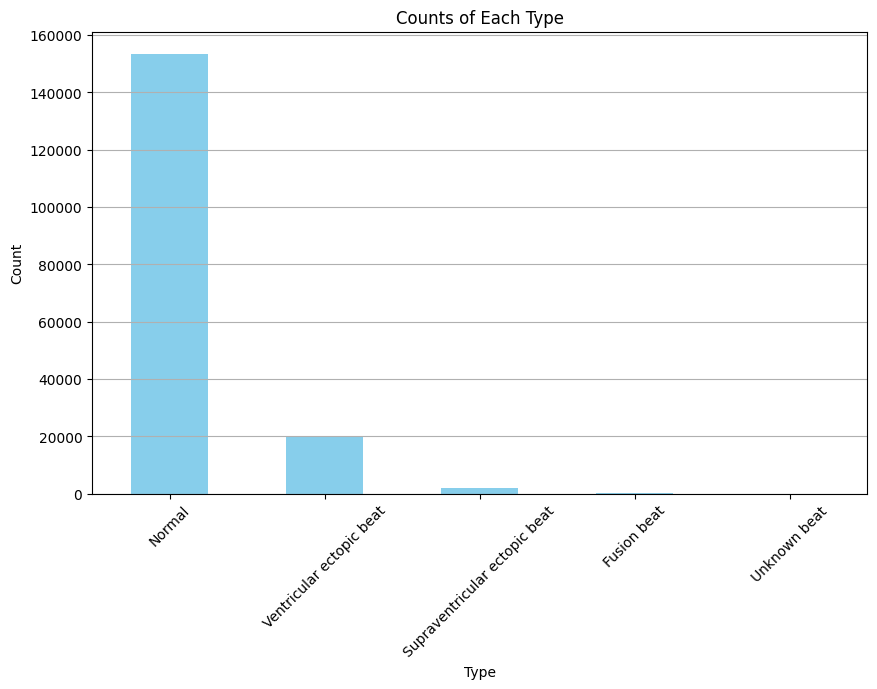

In [7]:
type_counts.index = type_counts.index.map(type_names)

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [8]:
data = data.drop(columns=['record'])

In [9]:
X = data.drop('type', axis=1)
y = data['type']

In [10]:
type_mapping = {'N': 0, 'SVEB': 1, 'VEB': 2, 'F': 3, 'Q': 4}
y = y.map(type_mapping)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
subset_size = 10000
X_train_subsample = X_train_resampled[:subset_size]
y_train_subsample = y_train_resampled[:subset_size]

In [19]:
model = RandomForestClassifier(random_state=101, n_estimators=50)
model.fit(X_train_subsample, y_train_subsample)

RandomForestClassifier(n_estimators=50, random_state=101)

In [20]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("*** Confusion Matrix ***")
print(confusion_matrix(y_test, y_pred))
print("*** Classification Report ***")
print(classification_report(y_test, y_pred, target_names=list(type_names.values())))


Accuracy: 0.9918909691003244
*** Confusion Matrix ***
[[30624    19    65     1     0]
 [   76   299    17     0     0]
 [   62     1  3937     0     0]
 [   18     0    25     1     0]
 [    1     0     0     0     0]]
*** Classification Report ***
                               precision    recall  f1-score   support

                       Normal       0.99      1.00      1.00     30709
Supraventricular ectopic beat       0.94      0.76      0.84       392
     Ventricular ectopic beat       0.97      0.98      0.98      4000
                  Fusion beat       0.50      0.02      0.04        44
                 Unknown beat       0.00      0.00      0.00         1

                     accuracy                           0.99     35146
                    macro avg       0.68      0.55      0.57     35146
                 weighted avg       0.99      0.99      0.99     35146



/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div